# Importing Necessary Modules

In [ ]:
from google.colab import drive
from tensorflow.keras.utils import plot_model
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import vgg16, ResNet50
from keras.layers import Conv2D, Input, Dense, Activation, MaxPooling2D, Flatten, AveragePooling2D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from keras.utils import to_categorical
drive.mount('/content/drive')

Mounted at /content/drive


# Fetching Peace and Thumbs Up Data, Labeling Peace as 0, and Thumbs Up as 1

In [ ]:
#reading data and labeling it
DIRECTORY = '/content/drive/MyDrive/thumbsup_peace'
CATEGORIES = ['peace_test', 'peace_train', 'thumbsup_test', 'thumbsup_train']
train_data = []
test_data = []
test_count = 0
train_count = 0
for category in CATEGORIES:
  folder = os.path.join(DIRECTORY, category)
  label = CATEGORIES.index(category) // 2
  # print(label)
  splited_name = category.split('_')
  # print(splited_name[1])

  if(splited_name[1] == "train"):
    # print(category)
      for img in os.listdir(folder):
        image = os.path.join(folder, img)
        image_arr = cv2.imread(image)
        image_arr = cv2.resize(image_arr, (224, 224))
        train_data.append([image_arr, label])
        train_count = train_count+1
  else:
    # print("test")
    for img in os.listdir(folder):
      image = os.path.join(folder, img)
      image_arr = cv2.imread(image)
      image_arr = cv2.resize(image_arr, (224, 224))
      test_data.append([image_arr, label])
      test_count = test_count+1

print('Number of total train data: ', train_count)
print('Number of test data: ', test_count)



Number of total train data:  650
Number of test data:  161


# Making np array X_train_val and Y_train_val from train data

In [ ]:
#making x and y from read data and label
random.shuffle(train_data)
x_train_val = []
y_train_val = []

for features,label in train_data:
  x_train_val.append(features)
  y_train_val.append(label)

#converitn x and y list to np array
x_train_val = np.array(x_train_val)
y_train_val = np.array(y_train_val)

# Making np array x_tes and y_test from test data

In [ ]:
#making x and y from read data and label
random.shuffle(test_data)
x_test = []
y_test = []

for features,label in test_data:
  x_test.append(features)
  y_test.append(label)

#converitn x and y list to np array
x_test = np.array(x_test)
y_test = np.array(y_test)
print(len(y_test))

161


# Plotting X_train_val

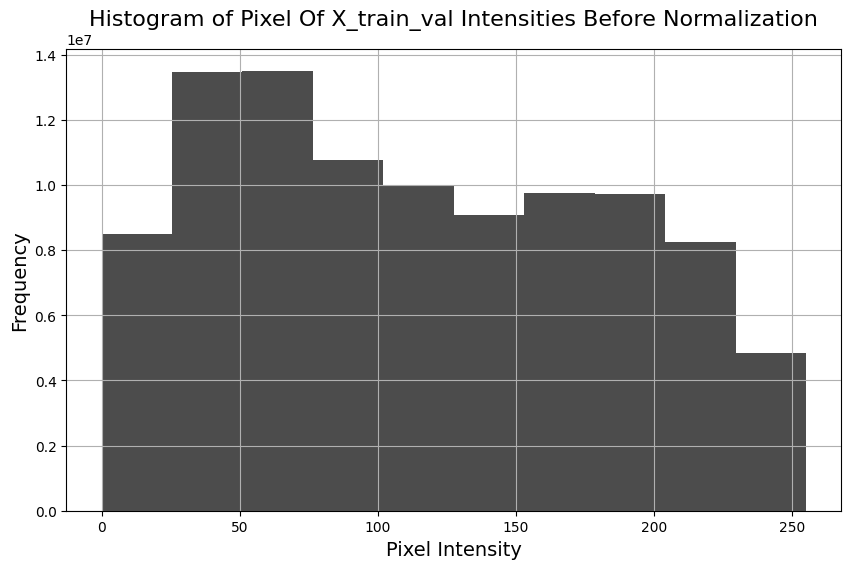

Highest intensity of pixel: 255
Lowest intensity of pixel: 0


In [ ]:
flatten_images = x_train_val.ravel()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(flatten_images, color='black', alpha=0.7)
plt.title('Histogram of Pixel Of X_train_val Intensities Before Normalization', fontsize=16)
plt.xlabel('Pixel Intensity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Print the highest and lowest intensity of pixel
print(f'Highest intensity of pixel: {np.max(flatten_images)}')
print(f'Lowest intensity of pixel: {np.min(flatten_images)}')


# Plotting X_test

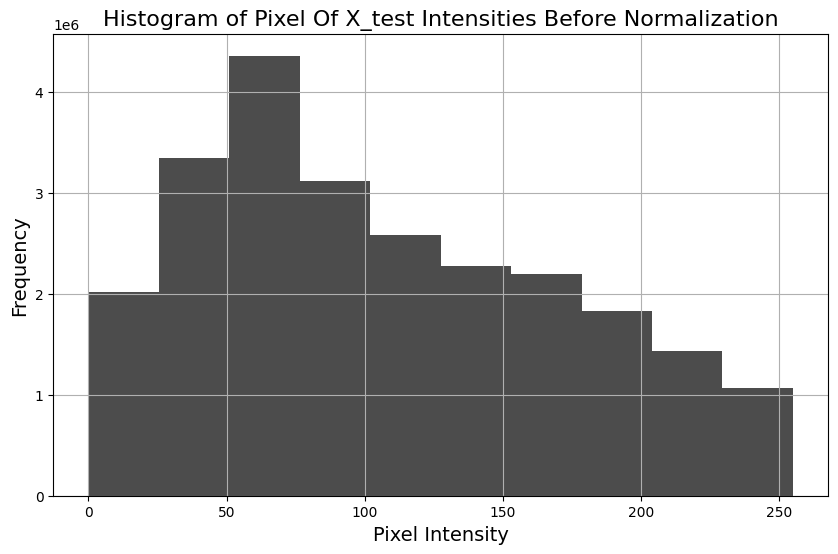

Highest intensity of pixel: 255
Lowest intensity of pixel: 0


In [ ]:
flatten_images = x_test.ravel()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(flatten_images, color='black', alpha=0.7)
plt.title('Histogram of Pixel Of X_test Intensities Before Normalization', fontsize=16)
plt.xlabel('Pixel Intensity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Print the highest and lowest intensity of pixel
print(f'Highest intensity of pixel: {np.max(flatten_images)}')
print(f'Lowest intensity of pixel: {np.min(flatten_images)}')


#Normalizing x_train_val and Plotting

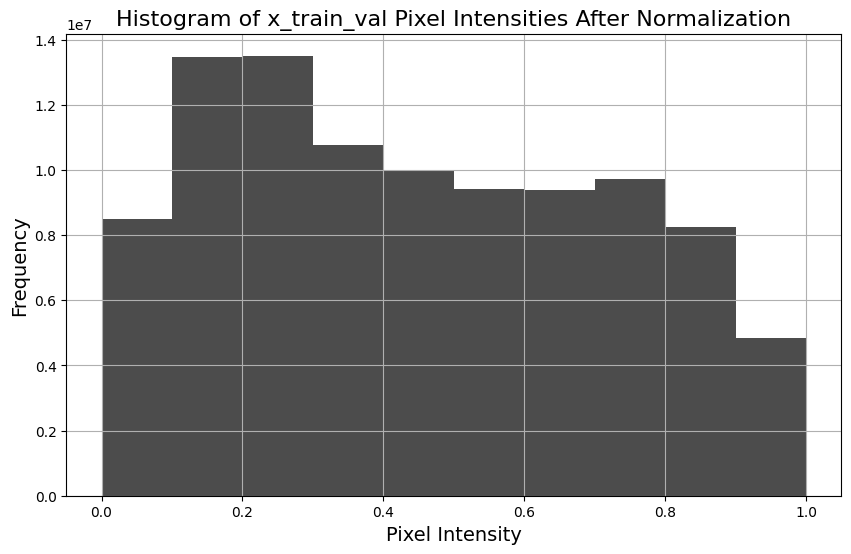

Highest intensity of pixel: 1.0
Lowest intensity of pixel: 0.0


In [ ]:
#normalizing x
x_train_val = x_train_val/255.0

# Assuming x is your array of images with shape (1012, 224, 224, 3)
# Flatten each image and concatenate them into a single array
flatten_images = x_train_val.ravel()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(flatten_images, color='black', alpha=0.7)
plt.title('Histogram of x_train_val Pixel Intensities After Normalization', fontsize=16)
plt.xlabel('Pixel Intensity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Print the highest and lowest intensity of pixel
print(f'Highest intensity of pixel: {np.max(flatten_images)}')
print(f'Lowest intensity of pixel: {np.min(flatten_images)}')


#Normalizing x_test and Plotting

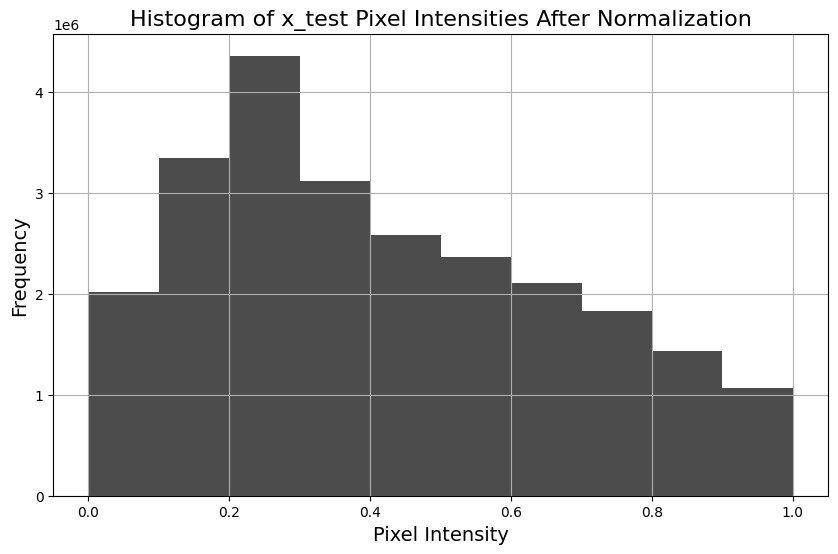

Highest intensity of pixel: 1.0
Lowest intensity of pixel: 0.0


In [ ]:
#normalizing x
x_test = x_test/255.0

# Assuming x is your array of images with shape (1012, 224, 224, 3)
# Flatten each image and concatenate them into a single array
flatten_images = x_test.ravel()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(flatten_images, color='black', alpha=0.7)
plt.title('Histogram of x_test Pixel Intensities After Normalization', fontsize=16)
plt.xlabel('Pixel Intensity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Print the highest and lowest intensity of pixel
print(f'Highest intensity of pixel: {np.max(flatten_images)}')
print(f'Lowest intensity of pixel: {np.min(flatten_images)}')


# Splitting Train and Validation Set

In [ ]:
# x_train, x_val, y_train, y_val  = train_test_split(x_train_val, y_train_val, test_size=0.1)
x_train = x_train_val[:int(len(x_train_val)*.9)]
x_val = x_train_val[-int(len(x_train_val)*.1):]
y_train = y_train_val[:int(len(y_train_val)*.9)]
y_val = y_train_val[-int(len(y_train_val)*.1):]

# Plotting y_train, y_val and y_test

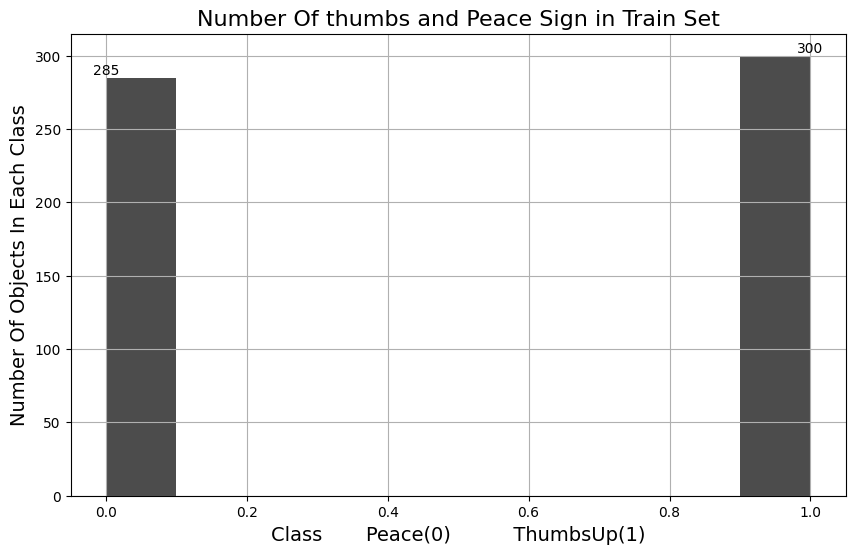

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_train, color='Black', alpha=0.7)
plt.title('Number Of thumbs and Peace Sign in Train Set', fontsize=16)
plt.xlabel('Class       Peace(0)          ThumbsUp(1)', fontsize=14)
plt.ylabel('Number Of Objects In Each Class', fontsize=14)
plt.grid('true')

# Get the counts of objects in each class
counts = np.bincount(y_train)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

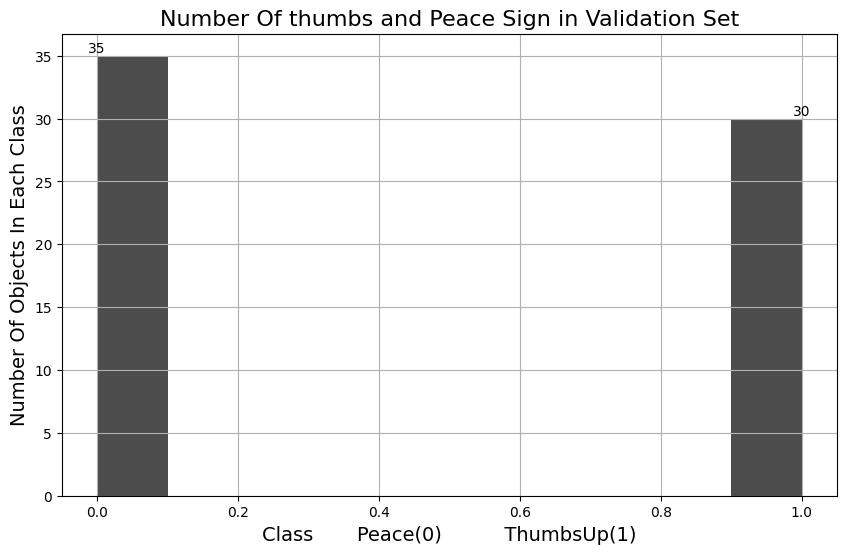

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_val, color='Black', alpha=0.7)
plt.title('Number Of thumbs and Peace Sign in Validation Set', fontsize=16)
plt.xlabel('Class       Peace(0)          ThumbsUp(1)', fontsize=14)
plt.ylabel('Number Of Objects In Each Class', fontsize=14)
plt.grid('true')
counts = np.bincount(y_val)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

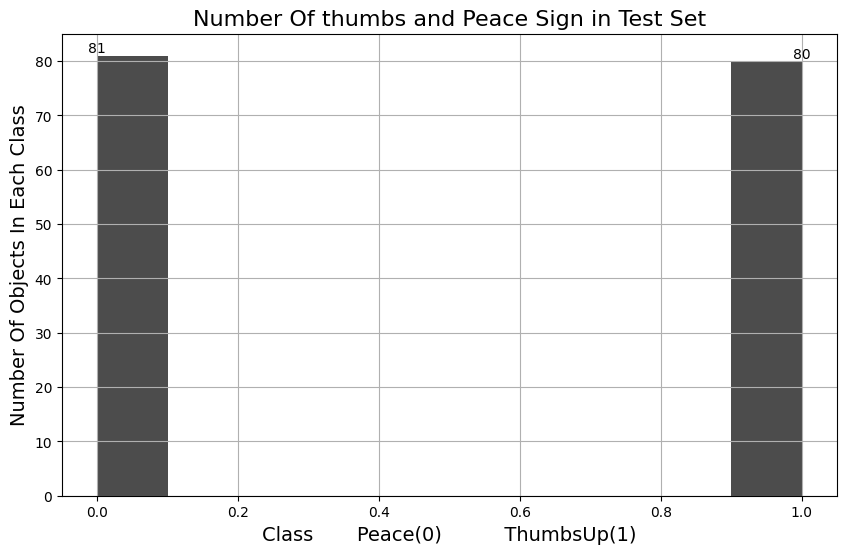

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_test, color='Black', alpha=0.7)
plt.title('Number Of thumbs and Peace Sign in Test Set', fontsize=16)
plt.xlabel('Class       Peace(0)          ThumbsUp(1)', fontsize=14)
plt.ylabel('Number Of Objects In Each Class', fontsize=14)
plt.grid('true')
counts = np.bincount(y_test)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

# Printing The Shapes of Train, Test and Validation Data

In [ ]:
print('Shape of x_train', np.shape(x_train))
print('Shape of x_val', np.shape(x_val))
print('Shape of x_test', np.shape(x_test))
print('Shape of y_train', np.shape(y_train))
print('Shape of y_val', np.shape(y_val))
print('Shape of y_test', np.shape(y_test))

Shape of x_train (585, 224, 224, 3)
Shape of x_val (65, 224, 224, 3)
Shape of x_test (161, 224, 224, 3)
Shape of y_train (585,)
Shape of y_val (65,)
Shape of y_test (161,)


# Extending Vgg16

In [ ]:
vgg16_model = tf.keras.applications.VGG16(
    weights='imagenet',  # You can use 'imagenet' to load ImageNet pre-trained weights
    include_top=False,   # Exclude the top (fully connected) layers
    input_shape=(224, 224, 3)  # Specify the input shape of your images
)


model = tf.keras.models.Sequential()
model.add(vgg16_model)
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

model.layers[0].trainable = False
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(
    learning_rate=0.001), metrics=['accuracy'])
model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
Total params: 14764866 (56.32 MB)
Trainable params: 50178 (196.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


# Showing Model Architecture

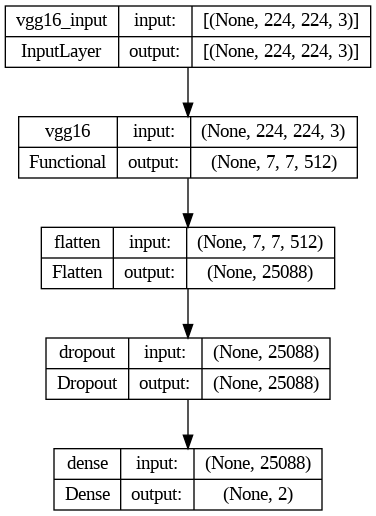

In [ ]:
# Plot and display the model architecture in the notebook
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Trainning The model with x and y

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=16)

Epoch 1/20
37/37 [==============================] - 406s 11s/step - loss: 0.5100 - accuracy: 0.7966 - val_loss: 0.2610 - val_accuracy: 0.8923
Epoch 2/20
37/37 [==============================] - 440s 12s/step - loss: 0.0929 - accuracy: 0.9692 - val_loss: 0.2358 - val_accuracy: 0.9077
Epoch 3/20
37/37 [==============================] - 396s 11s/step - loss: 0.0372 - accuracy: 0.9949 - val_loss: 0.1665 - val_accuracy: 0.9231
Epoch 4/20
37/37 [==============================] - 401s 11s/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.1629 - val_accuracy: 0.9231
Epoch 5/20
37/37 [==============================] - 394s 11s/step - loss: 0.0169 - accuracy: 0.9966 - val_loss: 0.1628 - val_accuracy: 0.9385
Epoch 6/20
37/37 [==============================] - 398s 11s/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.1484 - val_accuracy: 0.9231
Epoch 7/20
37/37 [==============================] - 396s 11s/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.1480 - val_accuracy: 0.9385
Epoch 

In [ ]:
performance_dict = history.history
print(performance_dict.keys())

# Check The Learning Curves

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(performance_dict ['loss'], color='purple', label='Train Loss')
plt.plot(performance_dict ['val_loss'], color='orange', label='Validation Loss')
plt.legend(loc='upper right', fontsize=20)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.title('Train Loss vs Validation Loss', fontsize=16)

plt.subplot(1,2,2)
plt.plot(performance_dict ['accuracy'], color='purple', label='Train Accuracy')
plt.plot(performance_dict ['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right', fontsize=20)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.title('Train Accuracy vs Validation Accuracy', fontsize=16)

# Evaluate The Model On Validation Set

In [ ]:
scores = model.evaluate(x_val, y_val)
# print(model.metrics_names)
print('Evaluating The Model On Validation Data')
print(model.metrics_names[1], scores[1]*100)


# Check What the model actually predicts In Validation Data

In [ ]:
plt.imshow(x_val[26])
print(y_val[26])

# Check What the model predicts in Test data

In [ ]:
prediction = model.predict(x_test)

In [ ]:
prediction[1]

In [ ]:
y_test[1]

In [ ]:
y_predicted = []
# length = prediction.shape[0]
for i in range(prediction.shape[0]):
  if(prediction[i][0] > prediction[i][1]):
    y_predicted.append(0)
  else:
    y_predicted.append(1)

y_predicted_text = []
for i in range(len(y_predicted)):
  if(y_predicted[i] == 0):
    y_predicted_text.append('Peace')
  else:
    y_predicted_text.append('Thumbs Up')


In [ ]:
plt.imshow(x_test[20])
print(y_predicted_text[20])

# Evaluate The Model On Test Set

In [ ]:
scores = model.evaluate(x_test, y_test)
# print(model.metrics_names)
print('Evaluating The Model On Test Data')
print(model.metrics_names[0], scores[0]*100)
print(model.metrics_names[1], scores[1]*100)

# Confussion Matrix Of CNN Based Classifier

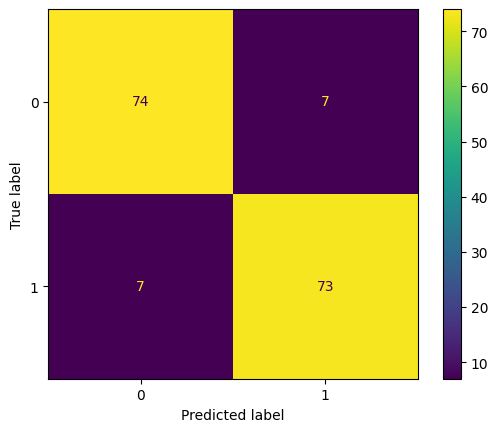

In [ ]:
y_predicted
actual = y_test
conf_mat = confusion_matrix(actual, y_predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot(fontsize=16)

# Resnet

In [ ]:
NUM_CLASSES = 2
model = Sequential()
model.add(ResNet50(include_top=False, pooling='max', weights="imagenet"))
model.add(Dense(NUM_CLASSES, activation='softmax'))
# ResNet-50 model is already trained, should not be trained
model.layers[0].trainable = False
model.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_26 (Dense)            (None, 2)                 4098      
                                                                 
Total params: 23591810 (90.00 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


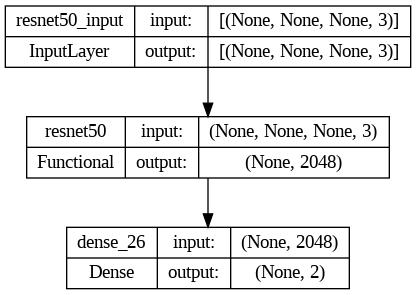

In [ ]:
# Plot and display the model architecture in the notebook
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Convert labels to one-hot encoding
num_classes = 2
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_val_onehot = to_categorical(y_val, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

In [ ]:
history = model.fit(x_train, y_train_onehot, epochs=100, validation_data=(x_val, y_val_onehot), batch_size=32)

Epoch 1/100
19/19 [==============================] - 7s 195ms/step - loss: 0.7002 - accuracy: 0.5556 - val_loss: 0.6981 - val_accuracy: 0.6000
Epoch 2/100
19/19 [==============================] - 2s 111ms/step - loss: 0.5667 - accuracy: 0.6974 - val_loss: 0.6039 - val_accuracy: 0.6769
Epoch 3/100
19/19 [==============================] - 2s 112ms/step - loss: 0.4652 - accuracy: 0.7675 - val_loss: 0.5451 - val_accuracy: 0.7385
Epoch 4/100
19/19 [==============================] - 2s 112ms/step - loss: 0.4276 - accuracy: 0.7949 - val_loss: 0.5053 - val_accuracy: 0.7846
Epoch 5/100
19/19 [==============================] - 2s 112ms/step - loss: 0.4125 - accuracy: 0.8239 - val_loss: 0.4885 - val_accuracy: 0.7846
Epoch 6/100
19/19 [==============================] - 2s 112ms/step - loss: 0.4036 - accuracy: 0.8222 - val_loss: 0.5157 - val_accuracy: 0.7846
Epoch 7/100
19/19 [==============================] - 2s 114ms/step - loss: 0.3982 - accuracy: 0.8205 - val_loss: 0.4750 - val_accuracy: 0.7846

Text(0.5, 1.0, 'Train Accuracy vs Validation Accuracy')

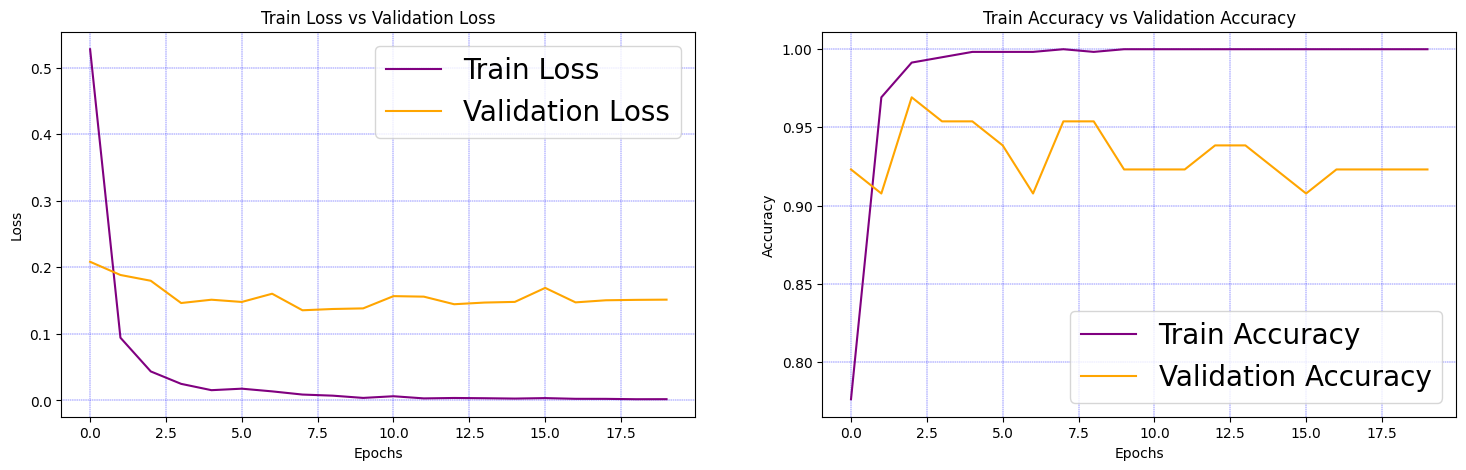

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(performance_dict ['loss'], color='purple', label='Train Loss')
plt.plot(performance_dict ['val_loss'], color='orange', label='Validation Loss')
plt.legend(loc='upper right', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.title('Train Loss vs Validation Loss')

plt.subplot(1,2,2)
plt.plot(performance_dict ['accuracy'], color='purple', label='Train Accuracy')
plt.plot(performance_dict ['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.title('Train Accuracy vs Validation Accuracy')

In [ ]:
scores = model.evaluate(x_test, y_test_onehot)
# print(model.metrics_names)
print('Evaluating The Model On Test Data')
print(model.metrics_names[0], scores[0]*100)
print(model.metrics_names[1], scores[1]*100)

6/6 [==============================] - 1s 84ms/step - loss: 0.6153 - accuracy: 0.7640
Evaluating The Model On Test Data
loss 61.53322458267212
accuracy 76.39751434326172


In [ ]:
prediction = model.predict(x_test)

6/6 [==============================] - 2s 91ms/step


In [ ]:
y_predicted = []
# length = prediction.shape[0]
for i in range(prediction.shape[0]):
  if(prediction[i][0] > prediction[i][1]):
    y_predicted.append(0)
  else:
    y_predicted.append(1)

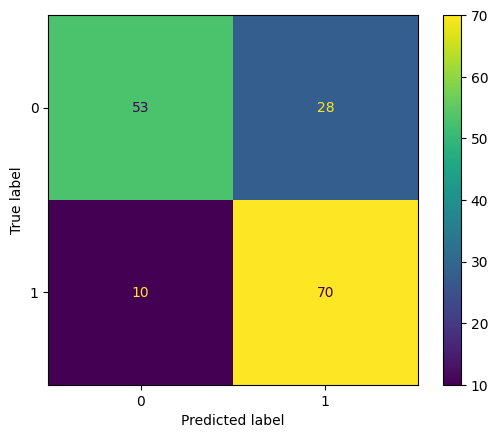

In [ ]:
y_predicted
actual = y_test
conf_mat = confusion_matrix(actual, y_predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()